In [ ]:
import pandas as pd


file_path = '/content/flight_price.xlsx'
data = pd.read_excel(file_path)

data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd

data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M', errors='coerce')

data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')[0], format='%H:%M', errors='coerce')

data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Minute'] = data['Dep_Time'].dt.minute
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Minute'] = data['Arrival_Time'].dt.minute

data = data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1)

def convert_duration_to_minutes(duration):
    duration = duration.split()
    hours = int(duration[0][:-1]) * 60
    minutes = int(duration[1][:-1]) if len(duration) > 1 else 0
    return hours + minutes

data['Duration_Minutes'] = data['Duration'].apply(convert_duration_to_minutes)

data = data.drop(['Duration'], axis=1)


data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stops')
data['Total_Stops'] = data['Total_Stops'].str.extract(r'(\d+)')
data['Total_Stops'] = data['Total_Stops'].fillna(0).astype(int)


data = data.drop(['Route', 'Additional_Info'], axis=1)

data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


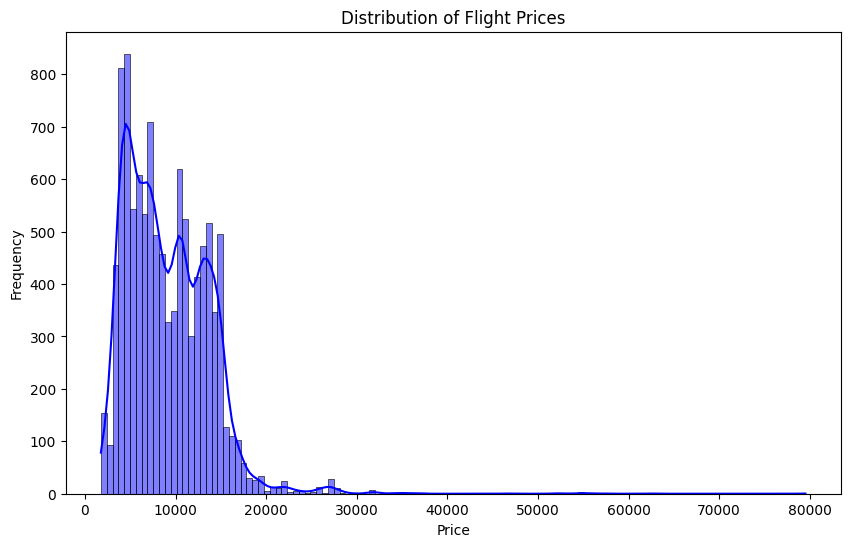

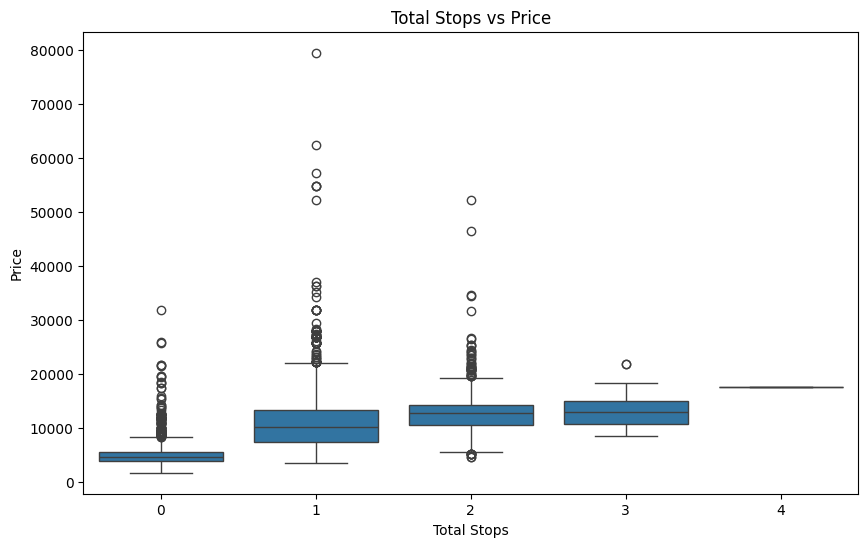

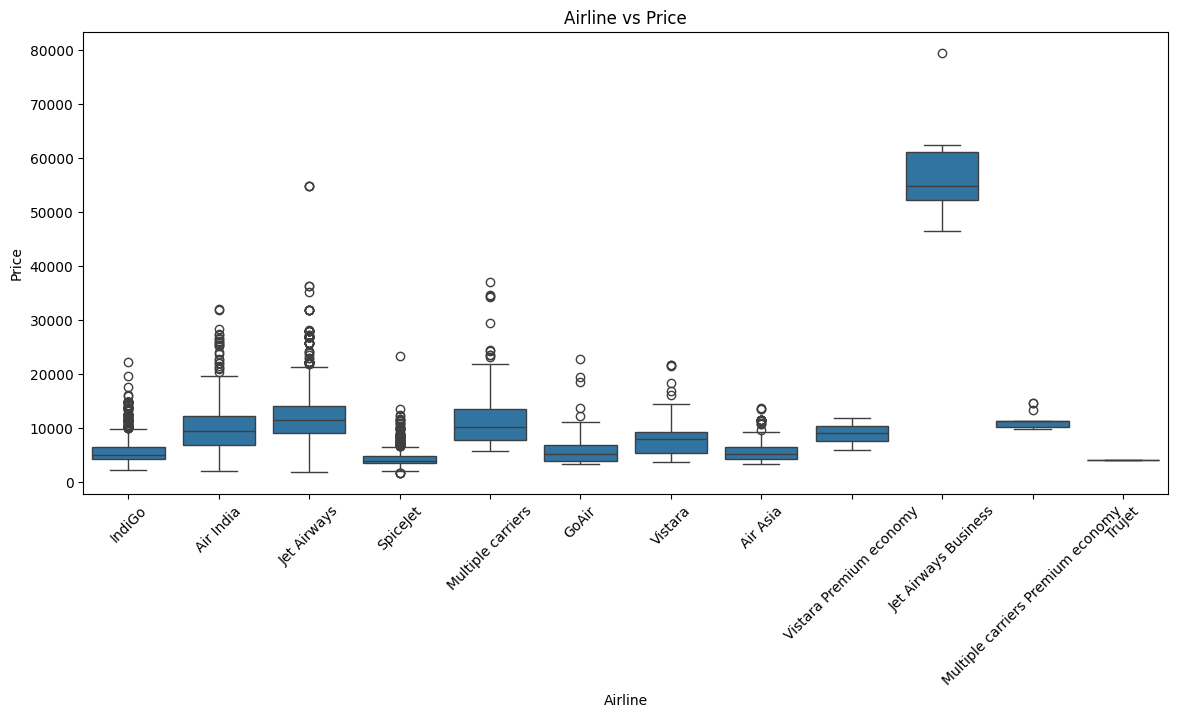

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Total Stops vs Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


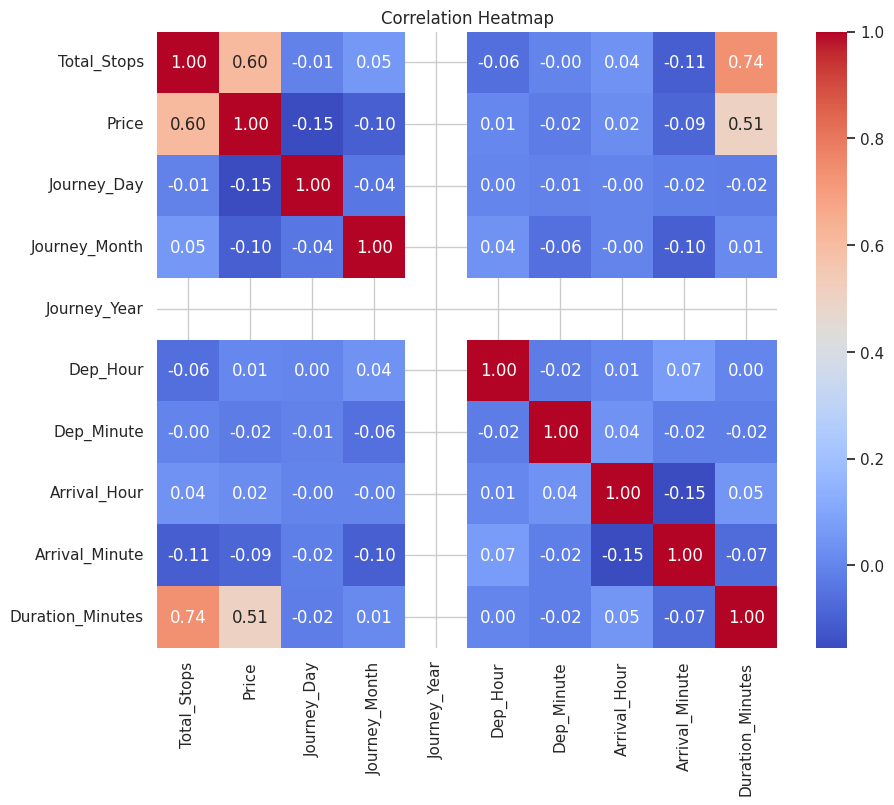

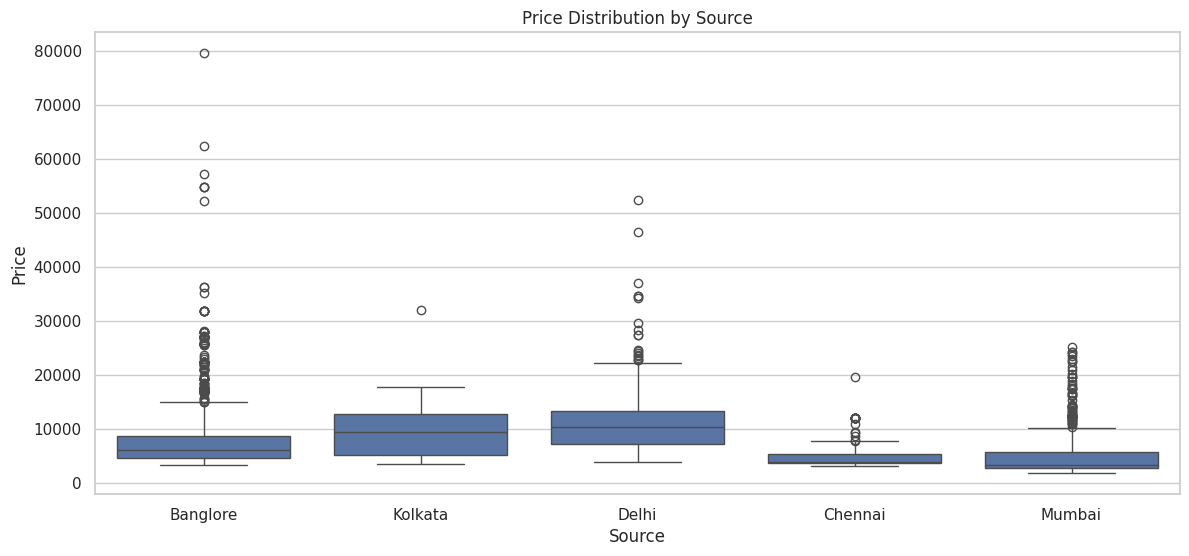

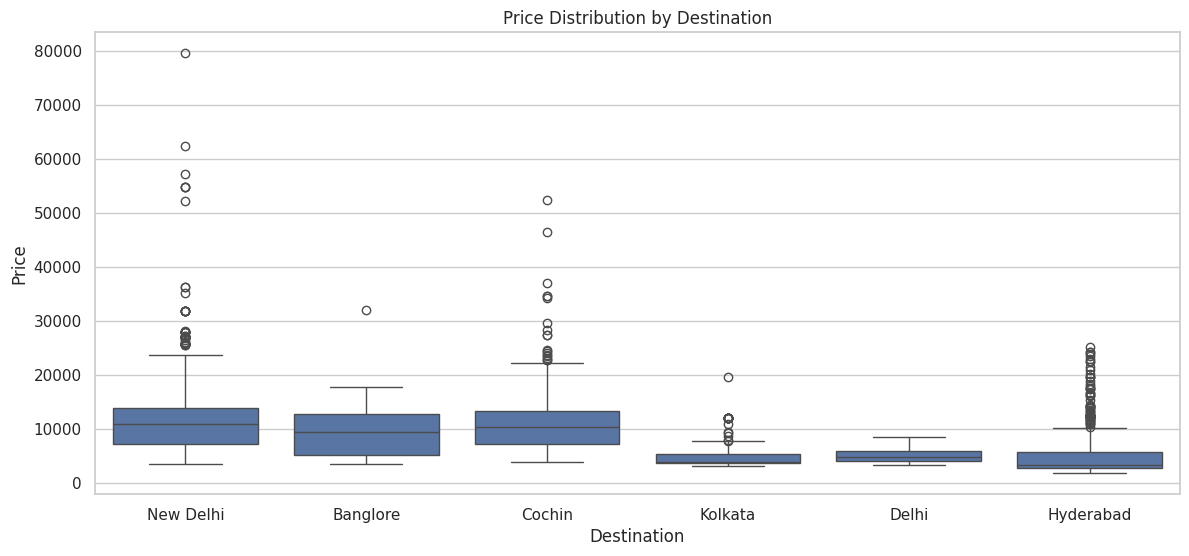

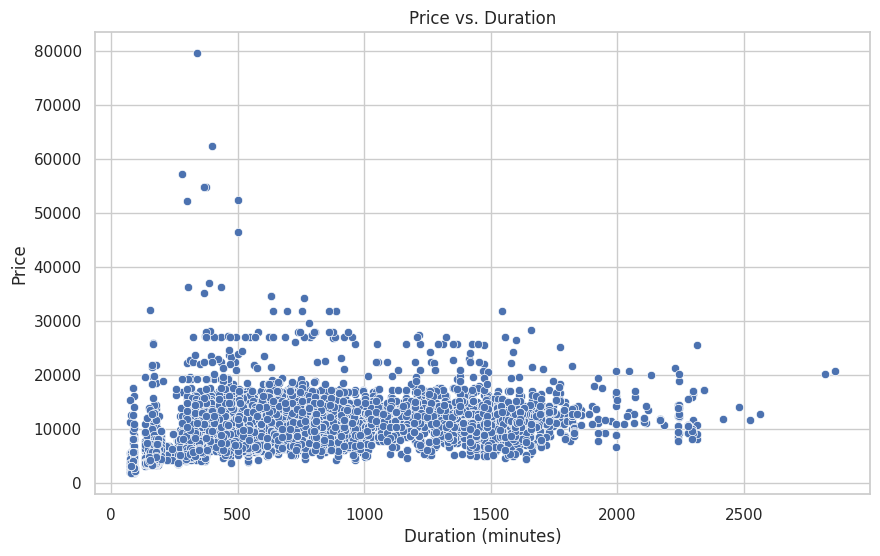

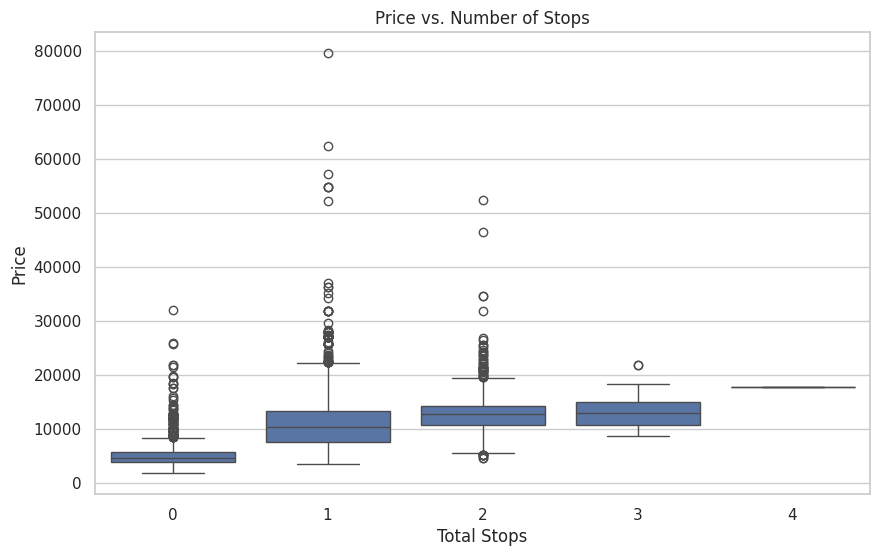

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
correlation = data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(14, 6))
sns.boxplot(x='Source', y='Price', data=data)
plt.title('Price Distribution by Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Destination', y='Price', data=data)
plt.title('Price Distribution by Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Minutes', y='Price', data=data)
plt.title('Price vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Price vs. Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Airline'] = label_encoder.fit_transform(data['Airline'])
data['Source'] = label_encoder.fit_transform(data['Source'])
data['Destination'] = label_encoder.fit_transform(data['Destination'])

# Split the data into features and target
X = data.drop('Price', axis=1)
y = data['Price']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression (predicting a single continuous value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 101179376.0000 - val_loss: 20568076.0000
Epoch 2/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 16236649.0000 - val_loss: 10650322.0000
Epoch 3/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12648721.0000 - val_loss: 9867901.0000
Epoch 4/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10423756.0000 - val_loss: 9479308.0000
Epoch 5/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10202684.0000 - val_loss: 9412119.0000
Epoch 6/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10941001.0000 - val_loss: 9091041.0000
Epoch 7/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11736248.0000 - val_loss: 8963199.0000
Epoch 8/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12342167.0000 - val_loss: 8924997.0000
Epoch 9/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12063914.0000 - val_loss: 8844937.0000
Epoch 10/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10111979.0000 - val_loss: 8855405.0000
Epoch

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Squared Error (MSE): 8053367.112628649
Root Mean Squared Error (RMSE): 2837.8455054193223
Mean Absolute Error (MAE): 2020.5224250647082
R-squared (R²): 0.619477391242981


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error (MAE): 2020.5224250647082
Root Mean Squared Error (RMSE): 2837.8455054193223
R-squared (R²): 0.619477391242981


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Load your data (assuming it's a DataFrame named 'data')
data = pd.read_csv('your_data.csv')

# Feature Engineering
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month

# Convert times
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M', errors='coerce')
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')[0], format='%H:%M', errors='coerce')
data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Minute'] = data['Dep_Time'].dt.minute
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Minute'] = data['Arrival_Time'].dt.minute
data = data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1)

# Convert Duration to Minutes
def convert_duration_to_minutes(duration):
    duration = duration.split()
    hours = int(duration[0][:-1]) * 60
    minutes = int(duration[1][:-1]) if len(duration) > 1 else 0
    return hours + minutes

data['Duration_Minutes'] = data['Duration'].apply(convert_duration_to_minutes)
data = data.drop(['Duration'], axis=1)

# Handle Total Stops
data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stops')
data['Total_Stops'] = data['Total_Stops'].str.extract(r'(\d+)')
data['Total_Stops'] = data['Total_Stops'].fillna(0).astype(int)

# Drop unnecessary columns
data = data.drop(['Route', 'Additional_Info'], axis=1)

# One-Hot Encoding for Categorical Data
data = pd.get_dummies(data, columns=['Airline', 'Source', 'Destination'], drop_first=True)

# Split Data
X = data.drop('Price', axis=1)
y = data['Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Model
def build_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer='l2'))
    model.add(Dropout(0.3))  # Dropout to prevent overfitting
    model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.3))
    model.add(Dense(1))  # Output layer
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Training the Model
model = build_model()
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the Model
y_pred = model.predict(X_test_scaled)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optionally: Cross-Validation with Keras Wrapper
keras_regressor = KerasRegressor(build_fn=build_model, epochs=50, batch_size=32, verbose=0)
scores = cross_val_score(keras_regressor, X_train_scaled, y_train, cv=5)

print(f"Cross-validation Scores: {scores}")
print(f"Mean Cross-validation Score: {np.mean(scores)}")


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'